## Most Optimal Model for Accurately Predicting Breast Cancer Using the Breast Cancer Wisconsin (Diagnostic) Data Set

### Importing Necessary Libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Loading and Preprocessing Data

In [163]:
df = pd.read_csv('data.csv')
# Drop the 'id' and 'Unnamed: 32' columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True) 
print("Data size:", df.shape)
df.head()

Data size: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [164]:
predictor_df = df.copy()
y = predictor_df.diagnosis.values # target variable
x_data = predictor_df.drop(columns=["diagnosis"])  # features excluding 'diagnosis'
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [165]:
# Data Standardization
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0) 
x = (x_data - x_min)/(x_max- x_min).values
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [166]:
## Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (455, 30)
y_train size: (455,)

x_test size: (114, 30)
y_test size: (114,)


### Setting Up Models

In [167]:
# Logistic Regression
lr_model = LogisticRegression().fit(x_train, y_train)
# Random Forest Classifier
rf_model = RandomForestClassifier().fit(x_train, y_train)
# Support Vector Machines (SVM)
svm_model = SVC().fit(x_train, y_train)
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier().fit(x_train, y_train)

### Utilizing Models on Dataset

#### Logistic Regression

In [168]:
lr_y_train_pred = lr_model.predict(x_train)
lr_accuracy_train = accuracy_score(y_train, lr_y_train_pred)
print(lr_accuracy_train)

0.967032967032967


In [169]:
print(classification_report(y_train, lr_y_train_pred, labels=lr_model.classes_))

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       286
           M       0.99      0.92      0.95       169

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455



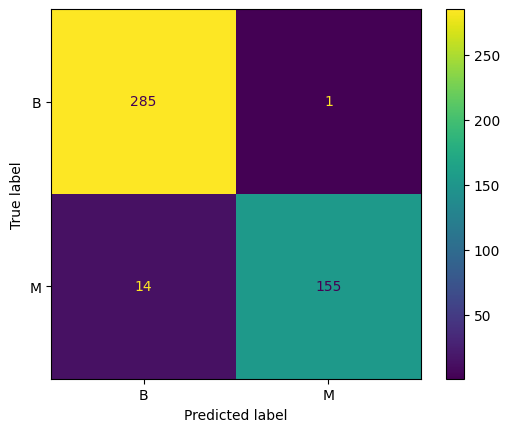

In [170]:
lr_train_matrix = confusion_matrix(y_train, lr_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_train_matrix, display_labels=lr_model.classes_)
disp.plot()
plt.show()

In [171]:
lr_y_test_pred = lr_model.predict(x_test)
lr_accuracy_test = accuracy_score(y_test, lr_y_test_pred)
print(lr_accuracy_test)

0.9824561403508771


In [174]:
print(classification_report(y_test, lr_y_test_pred, labels=lr_model.classes_))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



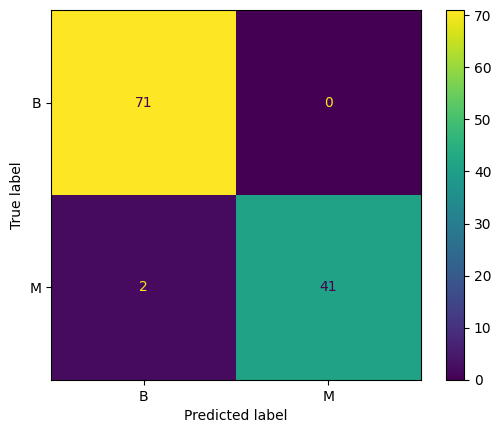

In [175]:
lr_test_matrix = confusion_matrix(y_test, lr_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_test_matrix, display_labels=lr_model.classes_)
disp.plot()
plt.show()

#### Random Forest Classifier

In [176]:
rf_y_train_pred = rf_model.predict(x_train)
rf_accuracy_train = accuracy_score(y_train, rf_y_train_pred)
print(rf_accuracy_train)

1.0


In [177]:
print(classification_report(y_train, rf_y_train_pred, labels=rf_model.classes_))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



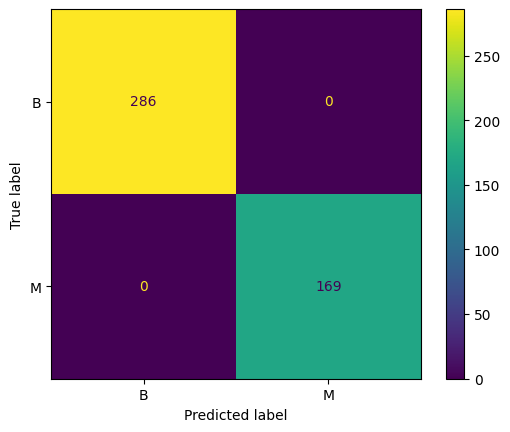

In [178]:
rf_train_matrix = confusion_matrix(y_train, rf_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_train_matrix, display_labels=rf_model.classes_)
disp.plot()
plt.show()

In [179]:
rf_y_test_pred = rf_model.predict(x_test)
rf_accuracy_test = accuracy_score(y_test, rf_y_test_pred)
print(rf_accuracy_test)

0.9649122807017544


In [180]:
print(classification_report(y_test, rf_y_test_pred, labels=rf_model.classes_))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



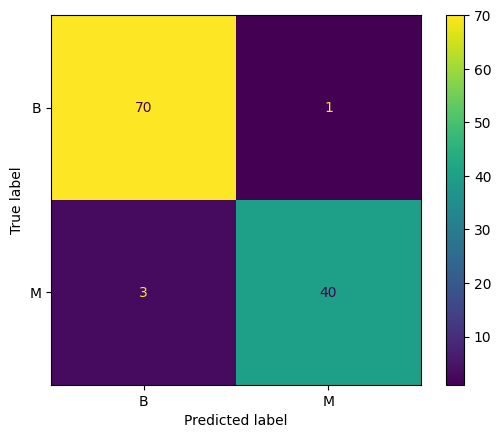

In [181]:
rf_test_matrix = confusion_matrix(y_test, rf_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_test_matrix, display_labels=rf_model.classes_)
disp.plot()
plt.show()

#### Support Vector Machines (SVM)

In [182]:
svm_y_train_pred = svm_model.predict(x_train)
svm_accuracy_train = accuracy_score(y_train, svm_y_train_pred)
print(svm_accuracy_train)

0.9824175824175824


In [183]:
print(classification_report(y_train, svm_y_train_pred, labels=svm_model.classes_))

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       286
           M       0.99      0.96      0.98       169

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



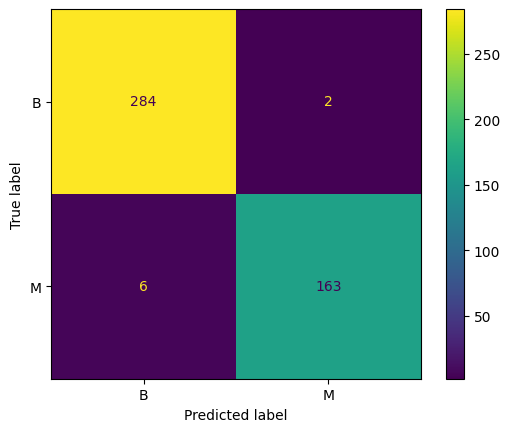

In [184]:
svm_train_matrix = confusion_matrix(y_train, svm_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_train_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [185]:
svm_y_test_pred = svm_model.predict(x_test)
svm_accuracy_test = accuracy_score(y_test, svm_y_test_pred)
print(svm_accuracy_test)

0.9736842105263158


In [186]:
print(classification_report(y_test, svm_y_test_pred, labels=svm_model.classes_))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



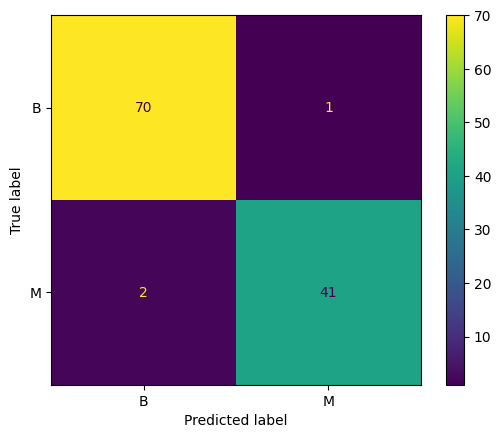

In [187]:
svm_test_matrix = confusion_matrix(y_test, svm_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_test_matrix, display_labels=svm_model.classes_)
disp.plot()
plt.show()

#### K-Nearest Neighbors (KNN) 

In [188]:
knn_y_train_pred = knn_model.predict(x_train)
knn_accuracy_train = accuracy_score(y_train, knn_y_train_pred)
print(knn_accuracy_train)

0.978021978021978


In [189]:
print(classification_report(y_train, knn_y_train_pred, labels=knn_model.classes_))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       286
           M       1.00      0.94      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



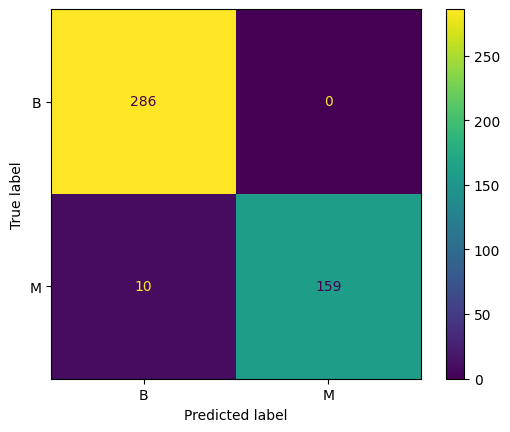

In [190]:
knn_train_matrix = confusion_matrix(y_train, knn_y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_train_matrix, display_labels=knn_model.classes_)
disp.plot()
plt.show()

In [191]:
knn_y_test_pred = knn_model.predict(x_test)
knn_accuracy_test = accuracy_score(y_test, knn_y_test_pred)
print(knn_accuracy_test)

0.9649122807017544


In [192]:
print(classification_report(y_test, knn_y_test_pred, labels=knn_model.classes_))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



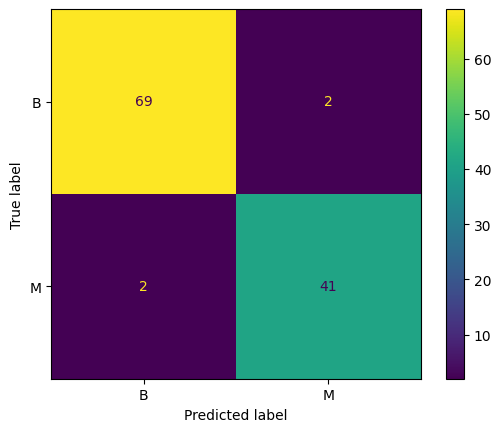

In [193]:
knn_test_matrix = confusion_matrix(y_test, knn_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_test_matrix, display_labels=knn_model.classes_)
disp.plot()
plt.show()

### Model Accuracy Comparison

In [198]:
# Create a dictionary with the accuracy values for each model
data = {
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Machines', 'K-Nearest Neighbors'],
    'Train Accuracy': [lr_accuracy_train, rf_accuracy_train, svm_accuracy_train, knn_accuracy_train],
    'Test Accuracy': [lr_accuracy_test, rf_accuracy_test, svm_accuracy_test, knn_accuracy_test]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

                   Model  Train Accuracy  Test Accuracy
     Logistic Regression        0.967033       0.982456
Random Forest Classifier        1.000000       0.964912
 Support Vector Machines        0.982418       0.973684
     K-Nearest Neighbors        0.978022       0.964912


### Conclusion

<b>Logistic Regression</b> achieved the highest test accuracy of 98.25%, making it the most accurate model for breast cancer prediction in this case.